# Chapter 2

> In this setting, the advertising budgets are input variables while sales input variable is an output variable. The input variables are typically denoted using the symbol X, with a subscript to distinguish them. So X1 might be the TV budget, X2 the radio budget, and X3 the newspaper budget. The inputs go by different names, such as predictors, independent variables, features, predictor, independent variable, feature, or sometimes just variables. The output variable—in this case, sales—is often called the response or dependent variable, and is typically denoted response using the symbol Y. Throughout this book, we will use all of these terms interchangeably.

**Definição formal de um modelo estimativo:** Dados $X$ e $Y$ é possível definir diversos $Y = f(X) + \epsilon$ onde $\epsilon$ é o erro.

As principais motivações são obter predições (determinar a função que obtem as variáveis dependentes mais próximas possíveis do mundo real) e inferências (determinar o modelo que melhor descreve os dados e entender as características que fazem tal modelo a melhor opção).

## Regressão

$\epsilon$ é um valor otimizável usando a técnica de aprendizado estatístico correta mas não irredutível e existe uma prova matemática para determinar essa característica descrita na página 19. De forma resumida o exemplo mostra que determinar uma função onde não há erro inerente, no caso de uma regressão usando a qualidade de ajuste MSE, significa minimizar o valor esperado entre o quadrado da diferença dos valores reais e os valores preditos, valor que depende das funções mas também da variância do erro, um fator irredutível.

No caso de inferência, é preciso notar que muito frequentemente modelos que descrevem fielmente os dados não são simplesmente interpretáveis.

- Existem modelos compostos de funções contínuas que não são paramétricos (como interpolações e funções *spline*)

A forma de determinar o quão bem o modelo descreve os dados é preciso medir a qualidade de ajuste (*quality of fit*), que pode ser descrito de diversas formas e a mais adequada depende de análise do problema:
Em regressão um método muito comum é o MSE (erro da média quadrada) por ser diretamente proporcional ao erro.

$$
    MSE = \frac 1 n \sum_{i=1}^n (y_i - \hat f(x_i))^2
$$

Se essa métrica foi usada nos dados de treino é preciso chamar essa medida de *training MSE* porque é válida apenas nesse contexto. A métrica que precisa ser otimizada é o *test MSE*. Isso precisa ser feito ao testar os resultados com outro dataset, e não pode ser otimizado durante o treinamento dos dados porque durante o treinamento, a métrica utilizada será o *training MSE*, e os valores ótimos não estão necessariamente relacionados (*overfitting*).

Comparando a "flexibilidade" do modelo (conhecido mais formalmente como grau de liberdade da função, que pode ser interpretados como a flexibilidade de uma função como MSE) é possível ver que nem sempre o MSE mínimo em um conjunto é válido para o outro.

- Existem formas de estimar corretamente o test MSE usando dados de treino (cross-validation).

É possível provar matematicamente que o *test MSE* esperado pode ser decomposto sempre na soma da variância de $\hat f(x_0)$, quadrado do viés (bias) de $\hat f(x_0)$ e variância de $\epsilon$:

$$
    E(y_0 - \hat f(x_0))^2 = var(\hat f(x_0)) + [bias(\hat f(x_0))]^2 + var(\epsilon)
$$

Então minimizar o MSE de teste implica minimizar a variância e bias simultaneamente. Como os dois valores nunca são negativos, o menor valor possível é $var(\epsilon)$ como demonstrado antes.

* Variância: descrição quantitativa da mudança que ocorreria caso a função fosse estimada usando outro dataset.
* Bias: erro introduzido ao aproximar um problema da vida real. É necessário fazer assunções sobre o problema para gerar um modelo e por isso, existe viés inerente ao modelo. Por exemplo, se o modelo escolhido for linear e os dados polinomiais, bias será alto, mas se a função for polinomial, o bias será baixo.

De forma geral, quanto mais flexíveis os métodos menor o bias e maior a variância e vice versa (o que gera funções de MSE côncavas para baixo muito frequentemente). Otimizar apenas um parâmetro nunca atingirá o resultado ideal.

## Classificação

A qualidade do ajuste em classificação em geral é quantificada pela taxa de erro (fração de erros em comparação aos acertos):

$$
    \frac 1 n \sum^n_{i=1}I(y_i\neq \hat y_i)
$$

Um classificador de Bayes é um preditor que minimiza a taxa de erro de teste em média e pode ser demonstrado ao atribuir a classe mais provável matematicamente aos preditores dados. Vale notar que o erro minimizado nesse contexto é a taxa de erro bayesiano, que também é um parâmetro inerentemente não-nulo.

$$
    \epsilon_{\text{bayes}} = 1 - E(\max_j Pr(Y=j|X))
$$

Porém o classificador bayesiano é válido apenas quando se sabe a distribuição dos dados, e nem sempre essa informação é conhecida e o classificador bayesiano funciona mais como um ideal a ser atingido, já que o erro bayesiano é o menor erro factível.

KNN é um método que estima a probabilidade de forma condicional (analisando apenas os pontos mais próximos $N_0$):

$$
    Pr(Y=j|X=x_0) = \frac 1 K \sum_{i \in N_0} I(y_i=j)
$$

## Exercícios

### Conceituais

1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

    (a) The sample size n is extremely large, and the number of predicators p is small.
    
    **Resposta: Nesse contexto espera-se que um método de aprendizado mais flexível seja mais performático que um inflexível, já que com um volume muito alto de exemplos e poucos atributos é mais improvável que um modelo mais flexível seja enviesado pelos exemplos.**
    
    (b) The number of predictors p is extremely large, and the number of observations n is small.
    
    **Resposta: Nesse contexto espera-se que um método de aprendizado mais inflexível seja mais performático que um flexível, já que modelos mais flexíveis podem inferir relações inexistentes nos exemplos de treino, especialmente se existem muitos preditores envolvidos.**
    
    (c) The relationship between the predictors and response is highly non-linear.
    
    **Resposta: Nesse contexto espera-se que um método de aprendizado mais flexível seja mais performático que um inflexível, porque métodos não-lineares requerem mais graus de liberdade que modelos lineares.**
    
    (d) The variance of the error terms, i.e. σ 2 = Var(ϵ), is extremely high.
    
    **Resposta: Nesse contexto espera-se que um método de aprendizado mais inflexível seja mais performático que um flexível, já que a alta variância nos dados pode enviesar modelos mais flexíveis e causar inferências inexistentes nos dados reais.**

2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

    (a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors aﬀect CEO salary.
    
    **Resposta: Regressão, já que o salário dos CEOs são valores contínuos. Entender quais fatores afetam o salário requer entender como as variáveis independentes se relacionam com a variável dependente e trazer uma explicação com significado interpretável está mais relacionado com inferência que predição.**
    
    (b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.
    
    **Resposta: Classificação, já que sucesso é um valor discretos. Como o objetivo é criar um modelo que determine o sucesso para um produto, se trata de um caso de predição.**
    
    (c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.
    
    **Resposta: Regressão, já que o valor predito é contínuo. Além disso, como o próprio enunciado indica, é um trabalho mais relacionado à predição que inferência porque visa obter um modelo ajustado que determine a taxa de mudança.**

3. We now revisit the bias-variance decomposition.

    (a) Provide a sketch of typical (squared) bias, variance, training error, test error, and Bayes (or irreducible) error curves, on a single plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.
    
    (b) Explain why each of the five curves has the shape displayed in part (a).

4. You will now think of some real-life applications for statistical learning.

    (a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.
    
    **Resposta: Predição de doenças usando dados (estruturados e não estruturados) sobre o corpo humano em um trabalho de predição, já que o intuito é gerar um modelo ajustado que faça o diagnóstico do paciente corretamente.**
    
    (b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.
    
    **Resposta: Geração de score de risco para um investimento baseado nos dados públicos e histórico de preços de um ativo. O trabalho pode ser feito no intuito de predição para determinar um modelo generalista que faça a predição de risco. O mesmo trabalho pode ser feito visando inferência para entender o que faz de um ativo mais ou menos arriscado.**
    
    (c) Describe three real-life applications in which cluster analysis might be useful.
    
    **Resposta: Dada uma base de dados envolvendo produtos vendidos em um comércio, buscar relações entre diferentes produtos, visando inferir as relações entre eles.**

6. Describe the diﬀerences between a parametric and a non-parametric statistical learning approach. What are the advantages of a para-metric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

Abordagens paramétricas envolvem assumir características sobre os dados que definem sua forma antes de otimizar os parâmetros do modelo (em geral assumir um tipo de função que os define). Embora essas abordagens permitam que seja possível usar um volume menor de dados para ter um modelo ajustado, as assunções podem ser muito diferentes dos dados reais e fazer com que o modelo não descreva suficientemente os dados do mundo real. Além disso, modelos paramétricos sofrem frequentemente do dilema entre interpretabilidade e ajuste aos dados.

Abordagens não-paramétricas não fazem assunções desse tipo sobre os dados, o que evita esse tipo de enviesamento. Porém, o volume de dados necessário para evitar que as técnicas não assumam características inexistentes nos dados pode ser significativamente maior que em abordagens paramétricas.

7. The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X 1 = X 2 = X 3 = 0 using K-nearest neighbors.
    
| obs | x_1 | x_2 | x_3 | y     |
|-----|-----|-----|-----|-------|
| 1   | 0   | 3   | 0   | Red   |
| 2   | 2   | 0   | 0   | Red   |
| 3   | 0   | 1   | 3   | Red   |
| 4   | 0   | 1   | 2   | Green |
| 5   | -1  | 0   | 1   | Green |
| 6   | 1   | 1   | 1   | Red   |

(a) Compute the Euclidean distance between each observation and the test point, X 1 = X 2 = X 3 = 0.

In [1]:
def euclidean_distance(a, b):
    if len(a) != len(b):
        return "Error"

    distance = 0
    for x in range(len(a)):
        distance += (b[x] - a[x])**2
    return (distance)**(1/2)

dataset = [[ 0, 3, 0],
           [ 2, 0, 0],
           [ 0, 1, 3],
           [ 0, 1, 2],
           [-1, 0, 1],
           [ 1, 1, 1]]

test_point = [0,0,0]

distances = []
for data in dataset:
    distance = euclidean_distance(test_point, data)
    distances.append(distance)
    print(distance)

3.0
2.0
3.1622776601683795
2.23606797749979
1.4142135623730951
1.7320508075688772


(b) What is our prediction with K = 1? Why?

Verde, já que o ponto mais próximo é o no. 5.

(c) What is our prediction with K = 3? Why?

Vermelho, já que dos 3 vizinhos mais próximos a maioria é vermelha.

(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

O melhor valor de K nesse caso seria pequeno, porque valores pequenos em K tendem a reconhecer melhor mudanças sutis entre os vizinhos mais próximos que são causadas frequentemente em problemas altamente não-lineares, o que pode resultar em um modelo mais ajustado.

### Applied

8. This exercise relates to the College data set, which can be found in the file College.csv on the book website. It contains a number of variables for 777 diﬀerent universities and colleges in the US. The variables are

    * Private : Public/private indicator
    * Apps : Number of applications received
    * Accept : Number of applicants accepted
    * Enroll : Number of new students enrolled
    * Top10perc : New students from top 10 % of high school class
    * Top25perc : New students from top 25 % of high school class
    * F.Undergrad : Number of full-time undergraduates
    * P.Undergrad : Number of part-time undergraduates
    * Outstate : Out-of-state tuition
    * Room.Board : Room and board costs
    * Books : Estimated book costs
    * Personal : Estimated personal spending
    * PhD : Percent of faculty with Ph.D.’s
    * Terminal : Percent of faculty with terminal degree
    * S.F.Ratio : Student/faculty ratio
    * perc.alumni : Percent of alumni who donate
    * Expend : Instructional expenditure per student
    * Grad.Rate : Graduation rate
    
Before reading the data into R , it can be viewed in Excel or a text
editor.

(a) Use the read.csv() function to read the data into R . Call the
loaded data college . Make sure that you have the directory set
to the correct location for the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [8]:
college = pd.read_csv('../datasets/College.csv')

(b) Look at the data using the View() function. You should notice
that the first column is just the name of each university. We don’t
really want R to treat this as data. However, it may be handy to
have these names for later. Try the following commands:

```r
rownames ( college ) <- college [ , 1]
View ( college )
```
You should see that there is now a row.names column with the
name of each university recorded. This means that R has given
each row a name corresponding to the appropriate university. R
will not try to perform calculations on the row names. However,
we still need to eliminate the first column in the data where the
names are stored. Try

```r
college <- college [ , -1]
View ( college )
```

Now you should see that the first data column is Private . Note
that another column labeled row.names now appears before the
Private column. However, this is not a data column but rather
the name that R is giving to each row.

In [4]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


(c)

i. Use the summary() function to produce a numerical summary of the variables in the data set.

ii. Use the pairs() function to produce a scatterplot matrix of the first ten columns or variables of the data. Recall that you can reference the first ten columns of a matrix A using A[,1:10].

In [5]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


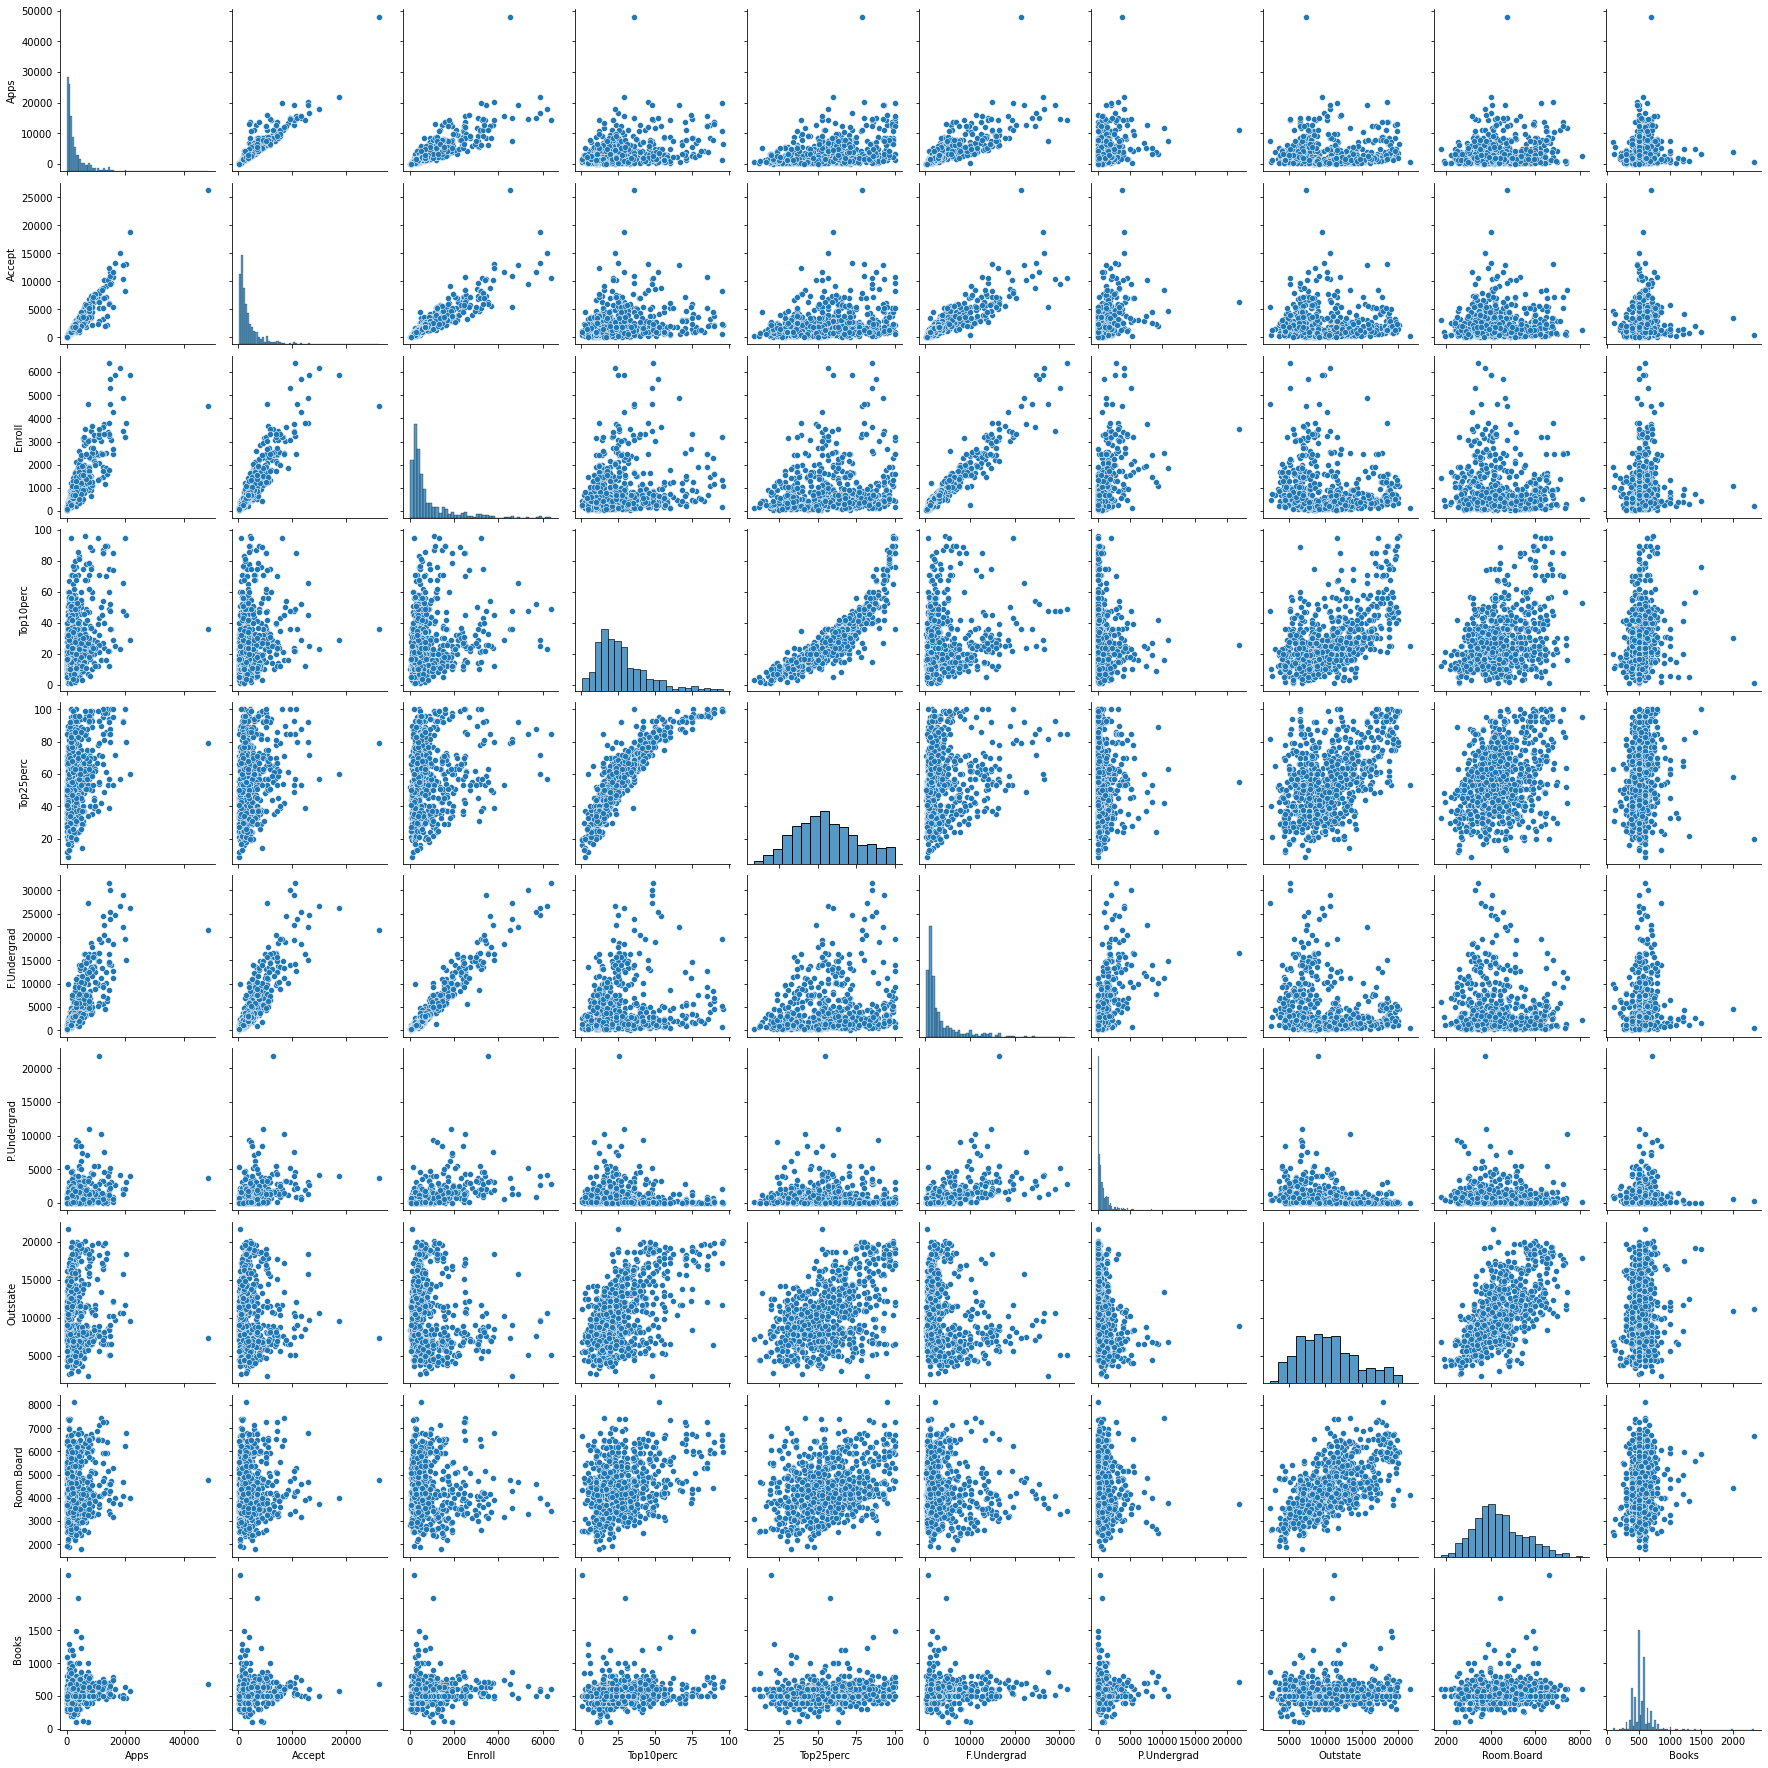

In [14]:
sns.pairplot(college[college.columns[1:12]])

iii. Use the plot() function to produce side-by-side boxplots of Outstate versus Private .

<AxesSubplot:xlabel='Outstate', ylabel='Private'>

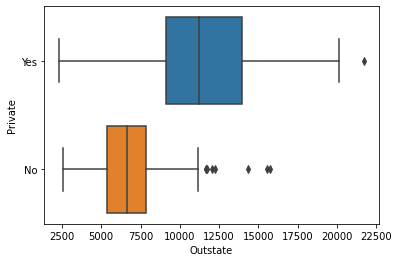

In [26]:
sns.boxplot(x='Outstate', y='Private', data=college[['Outstate', 'Private']])

iv.

Create a new qualitative variable, called Elite , by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10 % of their high school classes exceeds 50 %.

```
Elite <- rep ( " No " , nrow ( college ) )
Elite [ college $ Top10perc > 50] <- " Yes "
Elite <- as . factor ( Elite )
college <- data . frame ( college , Elite )
```

Use the summary() function to see how many elite universities there are. Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite .


In [26]:
# duvida: apply ou map? Qual é melhor?
college['Elite'] = college['Top10perc'].map(lambda item: 'Yes' if item > 50 else 'No')

<AxesSubplot:xlabel='Outstate', ylabel='Elite'>

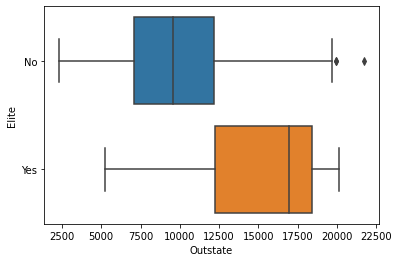

In [31]:
sns.boxplot(x='Outstate', y='Elite', data=college[['Outstate', 'Elite']])

v. Use the hist() function to produce some histograms with diﬀering numbers of bins for a few of the quantitative variables. You may find the command par(mfrow = c(2, 2)) useful: it will divide the print window into four regions so that four plots can be made simultaneously. Modifying the arguments to this function will divide the screen in other ways.

vi. Continue exploring the data, and provide a brief summary of what you discover.

<AxesSubplot:>

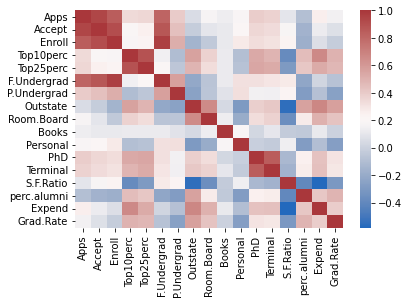

In [71]:
sns.heatmap(college.corr(), cmap='vlag')

9. This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

In [18]:
auto = pd.read_csv('../datasets/Auto.csv')

(a) Which of the predictors are quantitative, and which are qualitative?

In [30]:
auto.select_dtypes(include=['int64', 'float64'])

,mpg,cylinders,displacement,weight,acceleration,year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
392,27.0,4,140.0,2790,15.6,82,1
393,44.0,4,97.0,2130,24.6,82,2
394,32.0,4,135.0,2295,11.6,82,1
395,28.0,4,120.0,2625,18.6,82,1


`origin` não é uma coluna quantitativa apesar de ser do tipo `int64`.

In [31]:
auto.select_dtypes(exclude=['int64', 'float64'])

,horsepower,name
0,130,chevrolet chevelle malibu
1,165,buick skylark 320
2,150,plymouth satellite
3,150,amc rebel sst
4,140,ford torino
...,...,...
392,86,ford mustang gl
393,52,vw pickup
394,84,dodge rampage
395,79,ford ranger


`horsepower` não é uma coluna quantitativa apesar de ser do tipo `str`.

In [55]:
auto.loc[auto['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [72]:
auto['horsepower'] = auto['horsepower'].map(lambda item: np.NaN if item == '?' else np.float64(item))

In [98]:
qualitative_columns = ['origin', 'name']
quantitative_columns = [item for item in auto.columns if item not in qualitative_columns]

qualitative_auto = auto[qualitative_columns]
quantitative_auto = auto[quantitative_columns]

(b) What is the range of each quantitative predictor? You can answer this using the range() function.

In [117]:
# duvida: existe jeito melhor de fazer isso? Pivot table talvez?
metrics = pd.DataFrame()
metrics['min'] = quantitative_auto.min()
metrics['max'] = quantitative_auto.max()
metrics['range'] = metrics['max'] - metrics['min']
metrics

,min,max,range
mpg,9.0,46.6,37.6
cylinders,3.0,8.0,5.0
displacement,68.0,455.0,387.0
horsepower,46.0,230.0,184.0
weight,1613.0,5140.0,3527.0
acceleration,8.0,24.8,16.8
year,70.0,82.0,12.0


(c) What is the mean and standard deviation of each quantitative predictor?

In [120]:
metrics['mean'] = quantitative_auto.mean()
metrics['std'] = quantitative_auto.std()
metrics

,min,max,range,std,mean
mpg,9.0,46.6,37.6,7.825804,23.515869
cylinders,3.0,8.0,5.0,1.701577,5.458438
displacement,68.0,455.0,387.0,104.379583,193.532746
horsepower,46.0,230.0,184.0,38.491160,104.469388
weight,1613.0,5140.0,3527.0,847.904119,2970.261965
acceleration,8.0,24.8,16.8,2.749995,15.555668
year,70.0,82.0,12.0,3.690005,75.994962


(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [135]:
sample_quantitative_auto = (quantitative_auto.iloc[:10].copy().append(
    quantitative_auto.iloc[85:].copy()))

In [147]:
sample_metrics = pd.DataFrame()
sample_metrics['min'] = sample_quantitative_auto.min()
sample_metrics['max'] = sample_quantitative_auto.max()
sample_metrics['range'] = sample_metrics['max'] - sample_metrics['min']
sample_metrics['mean'] = sample_quantitative_auto.mean()
sample_metrics['std'] = sample_quantitative_auto.std()
sample_metrics


,min,max,range,mean,std
mpg,11.0,46.6,35.6,24.409317,7.913357
cylinders,3.0,8.0,5.0,5.378882,1.657398
displacement,68.0,455.0,387.0,187.680124,100.120925
horsepower,46.0,230.0,184.0,101.235849,36.185088
weight,1649.0,4997.0,3348.0,2936.807453,810.987533
acceleration,8.5,24.8,16.3,15.700621,2.706436
year,70.0,82.0,12.0,77.130435,3.131849


In [148]:
np.abs(metrics - sample_metrics)

,max,mean,min,range,std
mpg,0.0,0.893448,2.0,2.0,0.087553
cylinders,0.0,0.079556,0.0,0.0,0.044179
displacement,0.0,5.852621,0.0,0.0,4.258659
horsepower,0.0,3.233539,0.0,0.0,2.306072
weight,143.0,33.454511,36.0,179.0,36.916586
acceleration,0.0,0.144954,0.5,0.5,0.043559
year,0.0,1.135473,0.0,0.0,0.558156


(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

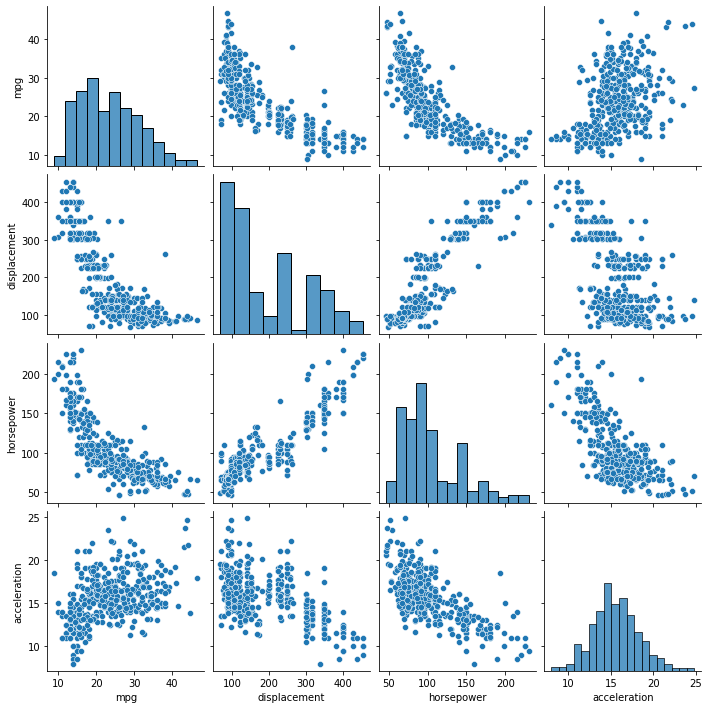

In [150]:
sns.pairplot(quantitative_auto.select_dtypes(include='float64'))

<AxesSubplot:>

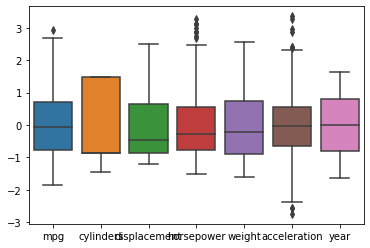

In [163]:
normalized_quantitative_auto=(quantitative_auto-quantitative_auto.mean())/quantitative_auto.std()
sns.boxplot(data=normalized_quantitative_auto)

<AxesSubplot:>

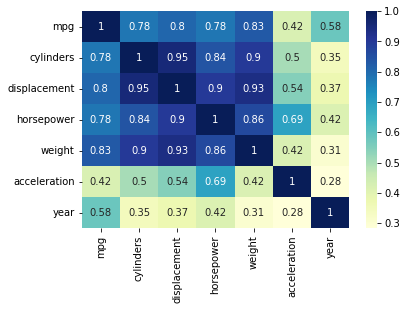

In [172]:
sns.heatmap(quantitative_auto.corr().abs(), annot=True, cmap="YlGnBu")

(f) Suppose that we wish to predict gas mileage ( mpg ) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg ? Justify your
answer.

**Resposta: Baseado nos gráficos acima, é notável que a milhagem está muito relacionada a `displacement, horsepower, weight, cylinders`, já que o coeficiente de correlação para essas variáveis é bem alto. Além disso os scatterplots indicam que `horsepower, displacement` podem ter uma relação linear com `mpg`.**

10. This exercise involves the Boston housing data set.

(a) To begin, load in the Boston data set. The Boston data set is part of the ISLR2 library.

```r
library ( ISLR2 )
```

Now the data set is contained in the object Boston .

```r
Boston
```

Read about the data set:

```r
? Boston
```

How many rows are in this data set? How many columns? What do the rows and columns represent?

In [6]:
boston = pd.read_csv('../datasets/Boston.csv', index_col=0)

In [8]:
boston.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
316,0.25356,0.0,9.90,0,0.544,5.705,77.7,3.9450,4,304,18.4,11.50,16.2
16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,8.47,19.9
194,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265,15.6,5.03,31.1
311,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,12.64,16.1
45,0.12269,0.0,6.91,0,0.448,6.069,40.0,5.7209,3,233,17.9,9.55,21.2


In [11]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


(b) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

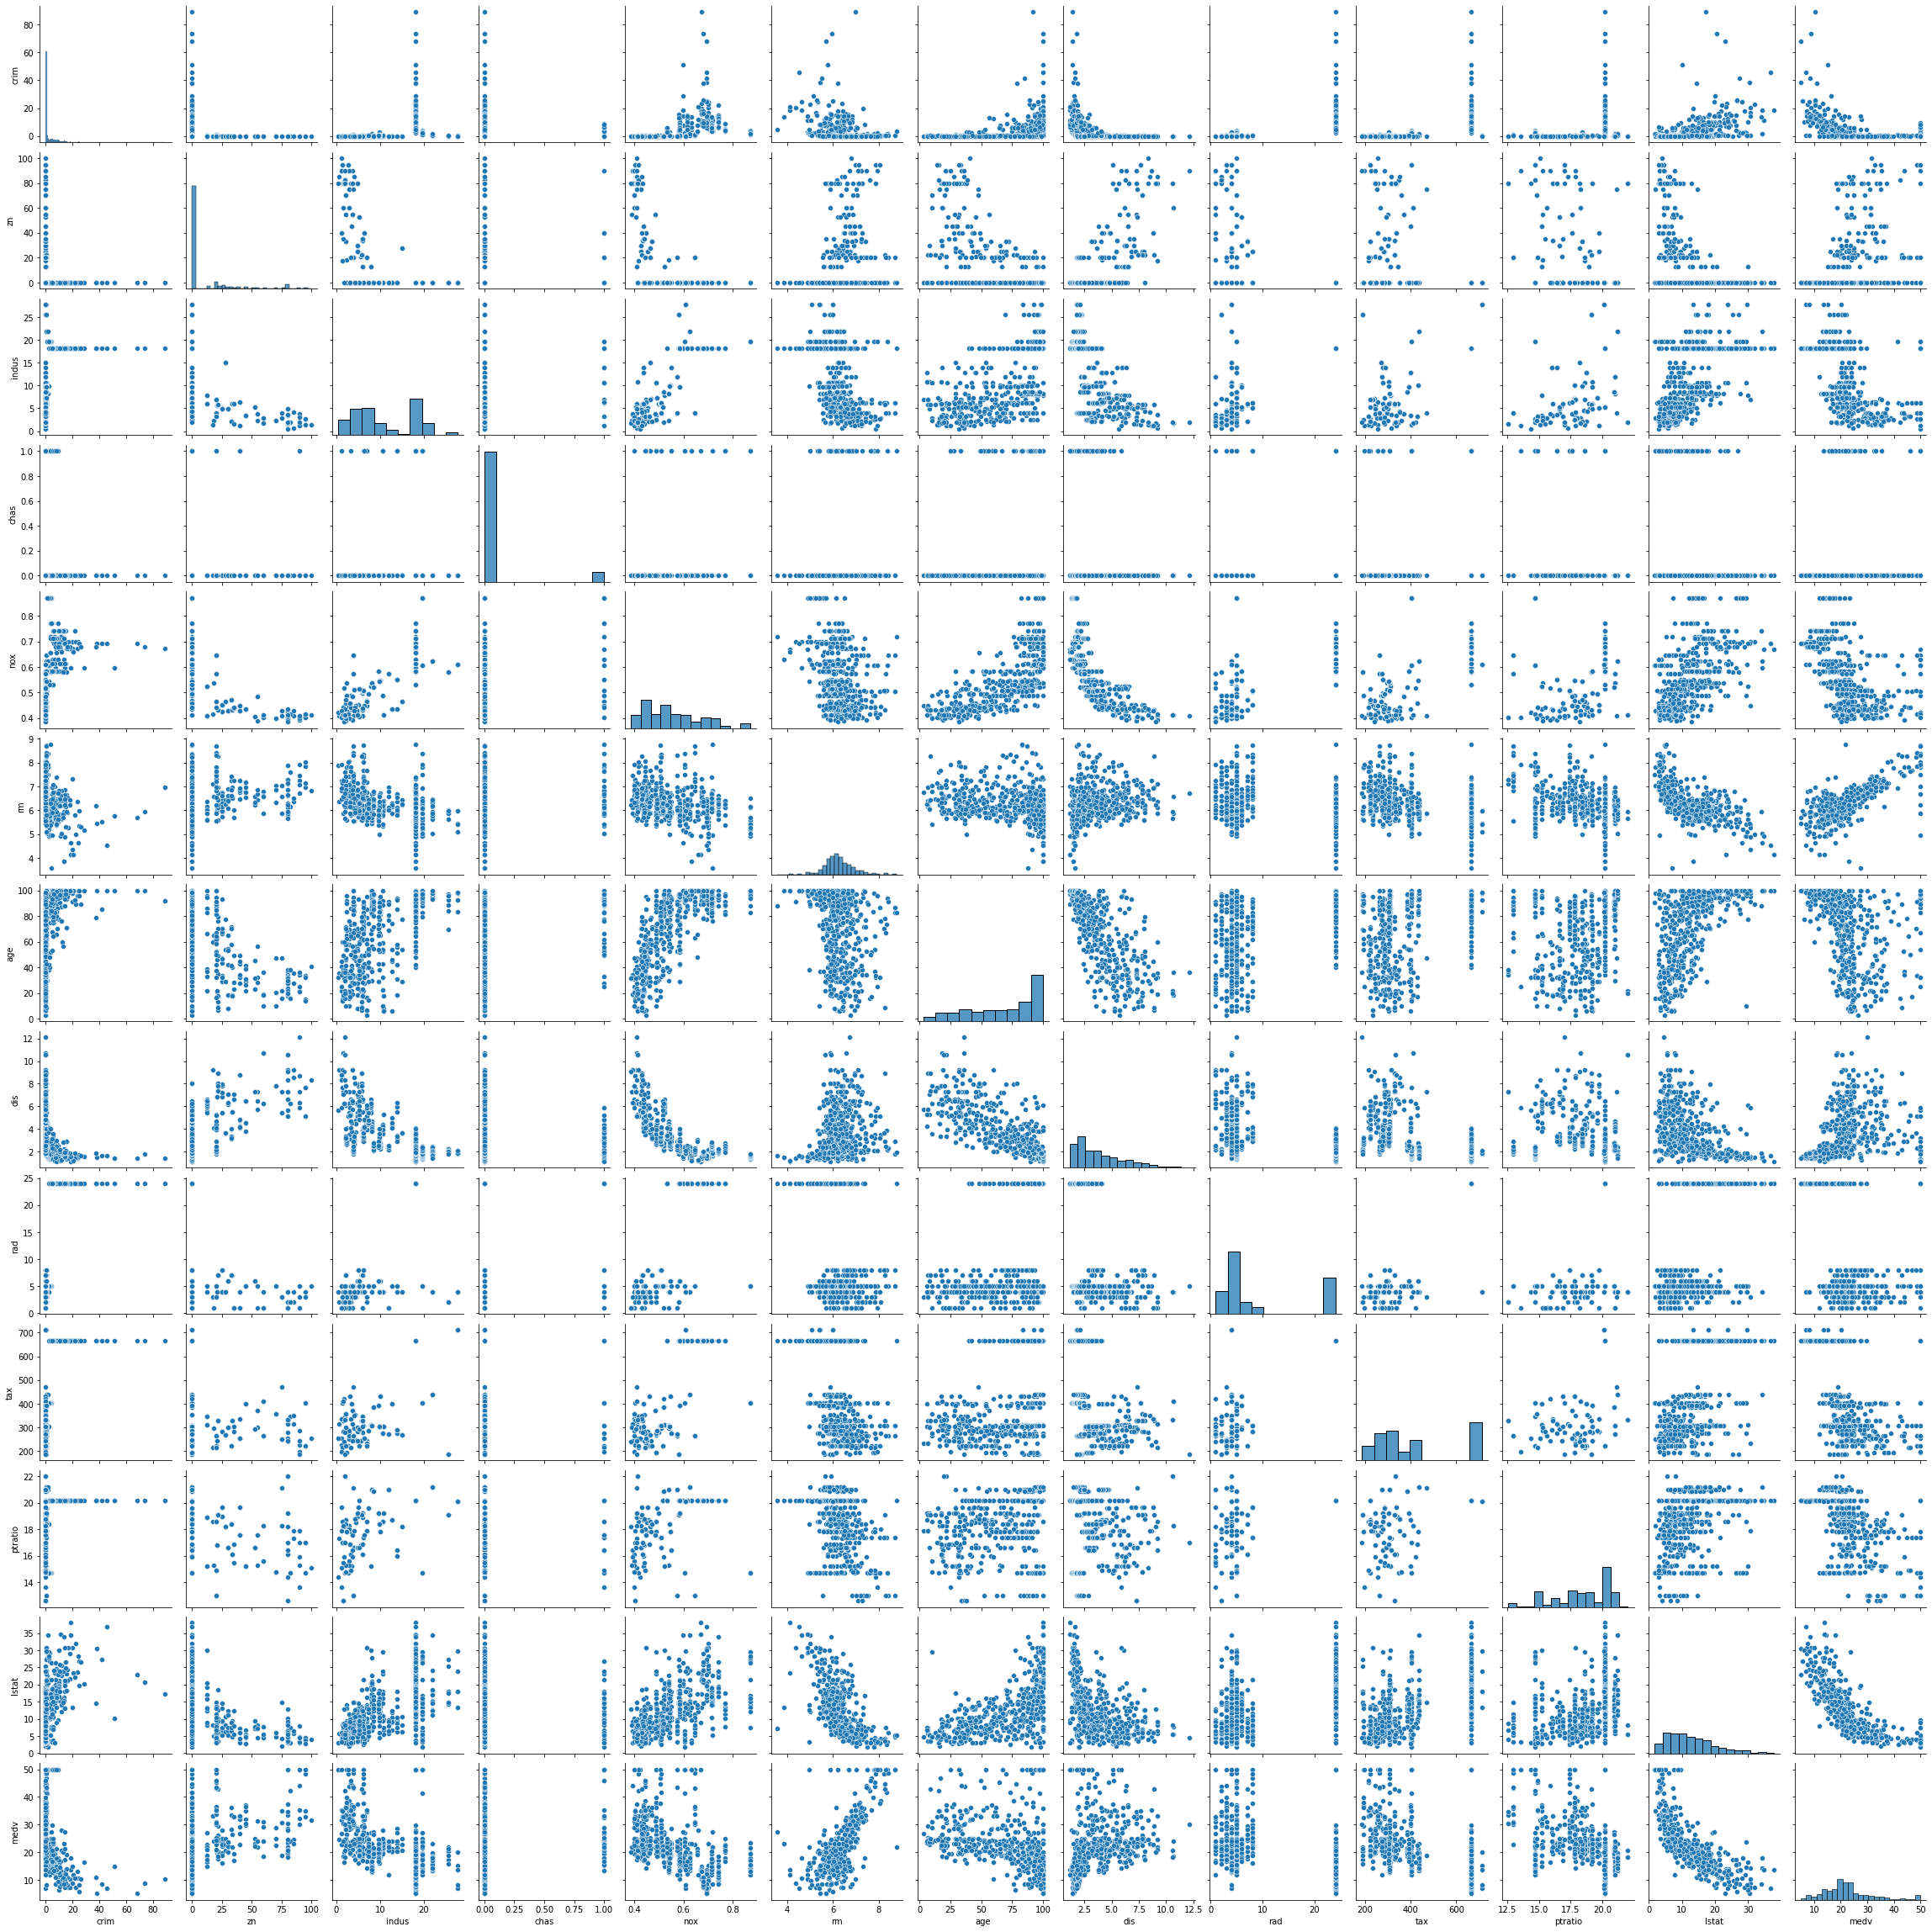

In [7]:
sns.pairplot(boston)

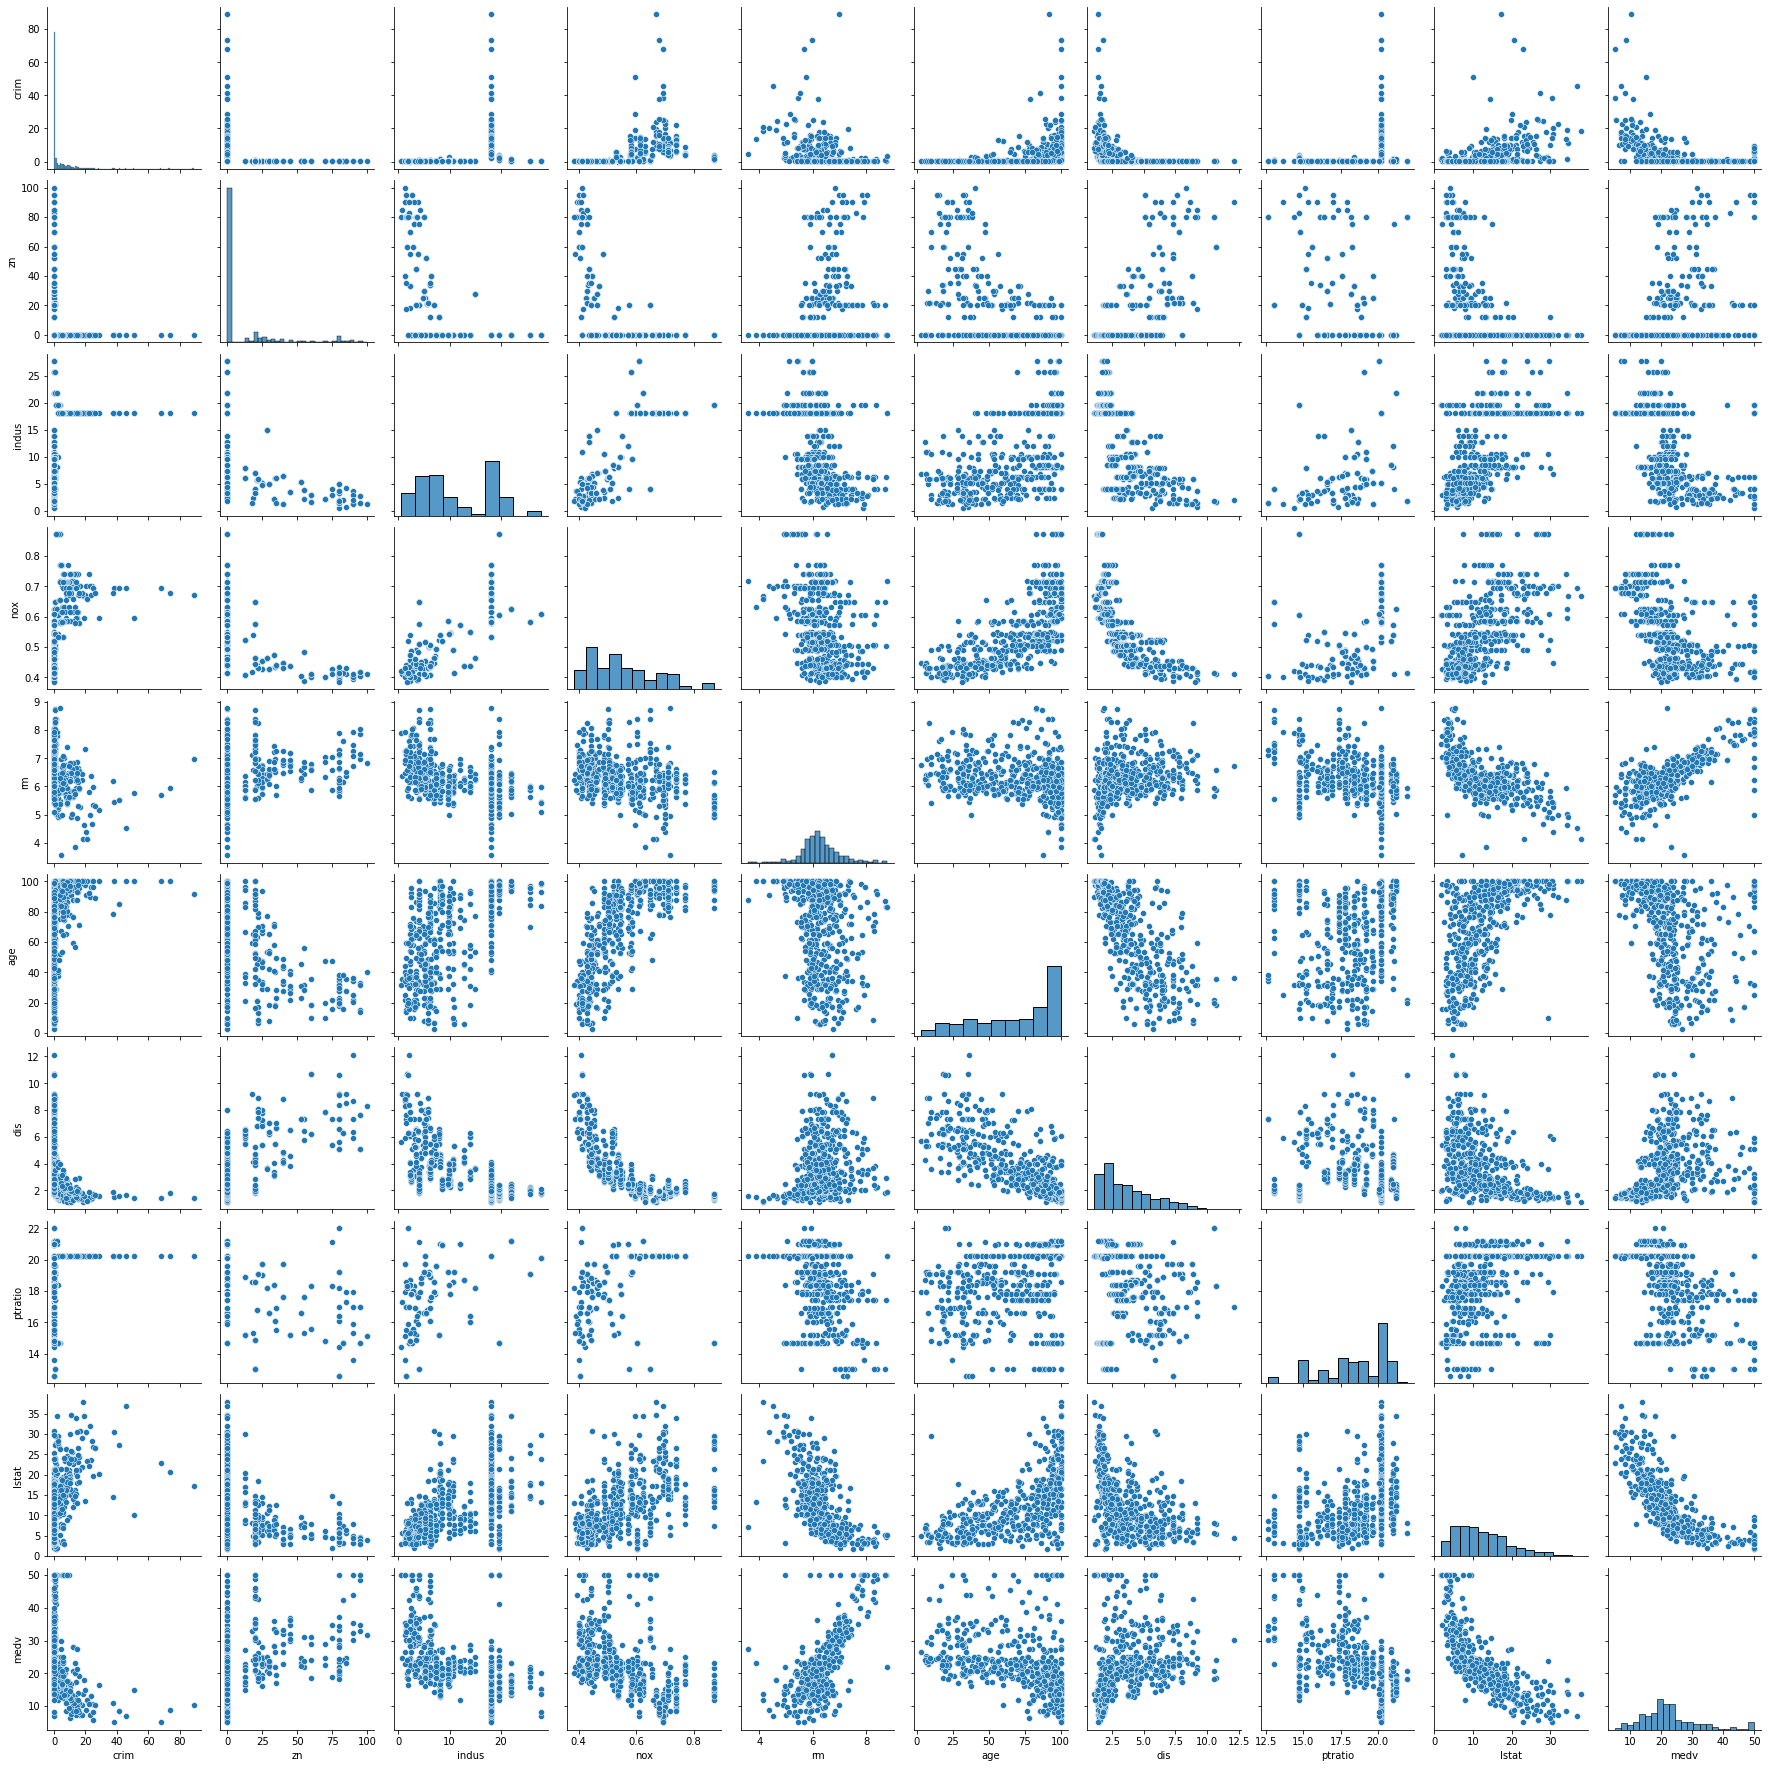

In [10]:
sns.pairplot(boston.select_dtypes(include='float64'))

<AxesSubplot:>

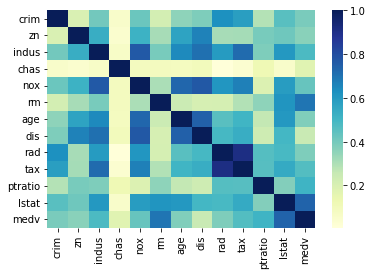

In [18]:
sns.heatmap(boston.corr().abs(), cmap='YlGnBu')

(c) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

**Resposta: Analisando o coeficiente de correlação e as dispersões, não é possível identificar nenhuma relação direta entre os preditores.**

(d) Do any of the census tracts of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.

<AxesSubplot:xlabel='crim', ylabel='Count'>

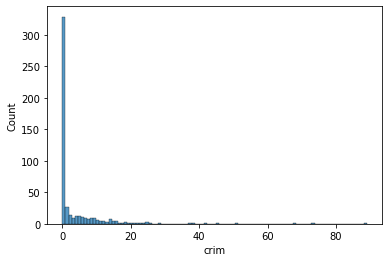

In [34]:
sns.histplot(boston['crim'])

In [47]:
boston['crim'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [48]:
boston.iloc[np.argmax(boston['crim'])]

crim        88.9762
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6710
rm           6.9680
age         91.9000
dis          1.4165
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       17.2100
medv        10.4000
Name: 381, dtype: float64

In [51]:
# duvida: o quao interpretaveis sao os ranges sem serem normalizados? E se forem?
boston.max() - boston.min()

crim        88.96988
zn         100.00000
indus       27.28000
chas         1.00000
nox          0.48600
rm           5.21900
age         97.10000
dis         10.99690
rad         23.00000
tax        524.00000
ptratio      9.40000
lstat       36.24000
medv        45.00000
dtype: float64

(e) How many of the census tracts in this data set bound the Charles
river?

(f) What is the median pupil-teacher ratio among the towns in this
data set?

(g) Which census tract of Boston has lowest median value of owner-
occupied homes? What are the values of the other predictors
for that census tract, and how do those values compare to the
overall ranges for those predictors? Comment on your findings.

(h) In this data set, how many of the census tracts average more
than seven rooms per dwelling? More than eight rooms per
dwelling? Comment on the census tracts that average more than
eight rooms per dwelling.

In [15]:
boston[boston['rm'] > 7].mean()

crim         0.979109
zn          28.171875
indus        5.775625
chas         0.125000
nox          0.504455
rm           7.570094
age         60.640625
dis          4.199617
rad          5.984375
tax        312.234375
ptratio     16.259375
lstat        5.474062
medv        38.396875
dtype: float64

In [16]:
boston[boston['rm'] > 8].mean()

crim         0.718795
zn          13.615385
indus        7.078462
chas         0.153846
nox          0.539238
rm           8.348538
age         71.538462
dis          3.430192
rad          7.461538
tax        325.076923
ptratio     16.361538
lstat        4.310000
medv        44.200000
dtype: float64